# Part 1: Get to know the dataset

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

### Plot images

            anger: S010_004_00000017.png	 rozmiar w bajtach: 1767	 liczba piskeli 48x48
            anger: S010_004_00000018.png	 rozmiar w bajtach: 1765	 liczba piskeli 48x48
            anger: S010_004_00000019.png	 rozmiar w bajtach: 1765	 liczba piskeli 48x48
         contempt: S138_008_00000007.png	 rozmiar w bajtach: 1752	 liczba piskeli 48x48
         contempt: S138_008_00000008.png	 rozmiar w bajtach: 1753	 liczba piskeli 48x48
         contempt: S138_008_00000009.png	 rozmiar w bajtach: 1755	 liczba piskeli 48x48
          disgust: S005_001_00000009.png	 rozmiar w bajtach: 1616	 liczba piskeli 48x48
          disgust: S005_001_00000010.png	 rozmiar w bajtach: 1625	 liczba piskeli 48x48
          disgust: S005_001_00000011.png	 rozmiar w bajtach: 1619	 liczba piskeli 48x48
             fear: S011_003_00000012.png	 rozmiar w bajtach: 1806	 liczba piskeli 48x48
             fear: S011_003_00000013.png	 rozmiar w bajtach: 1824	 liczba piskeli 48x48
             fear: S011_003_0000

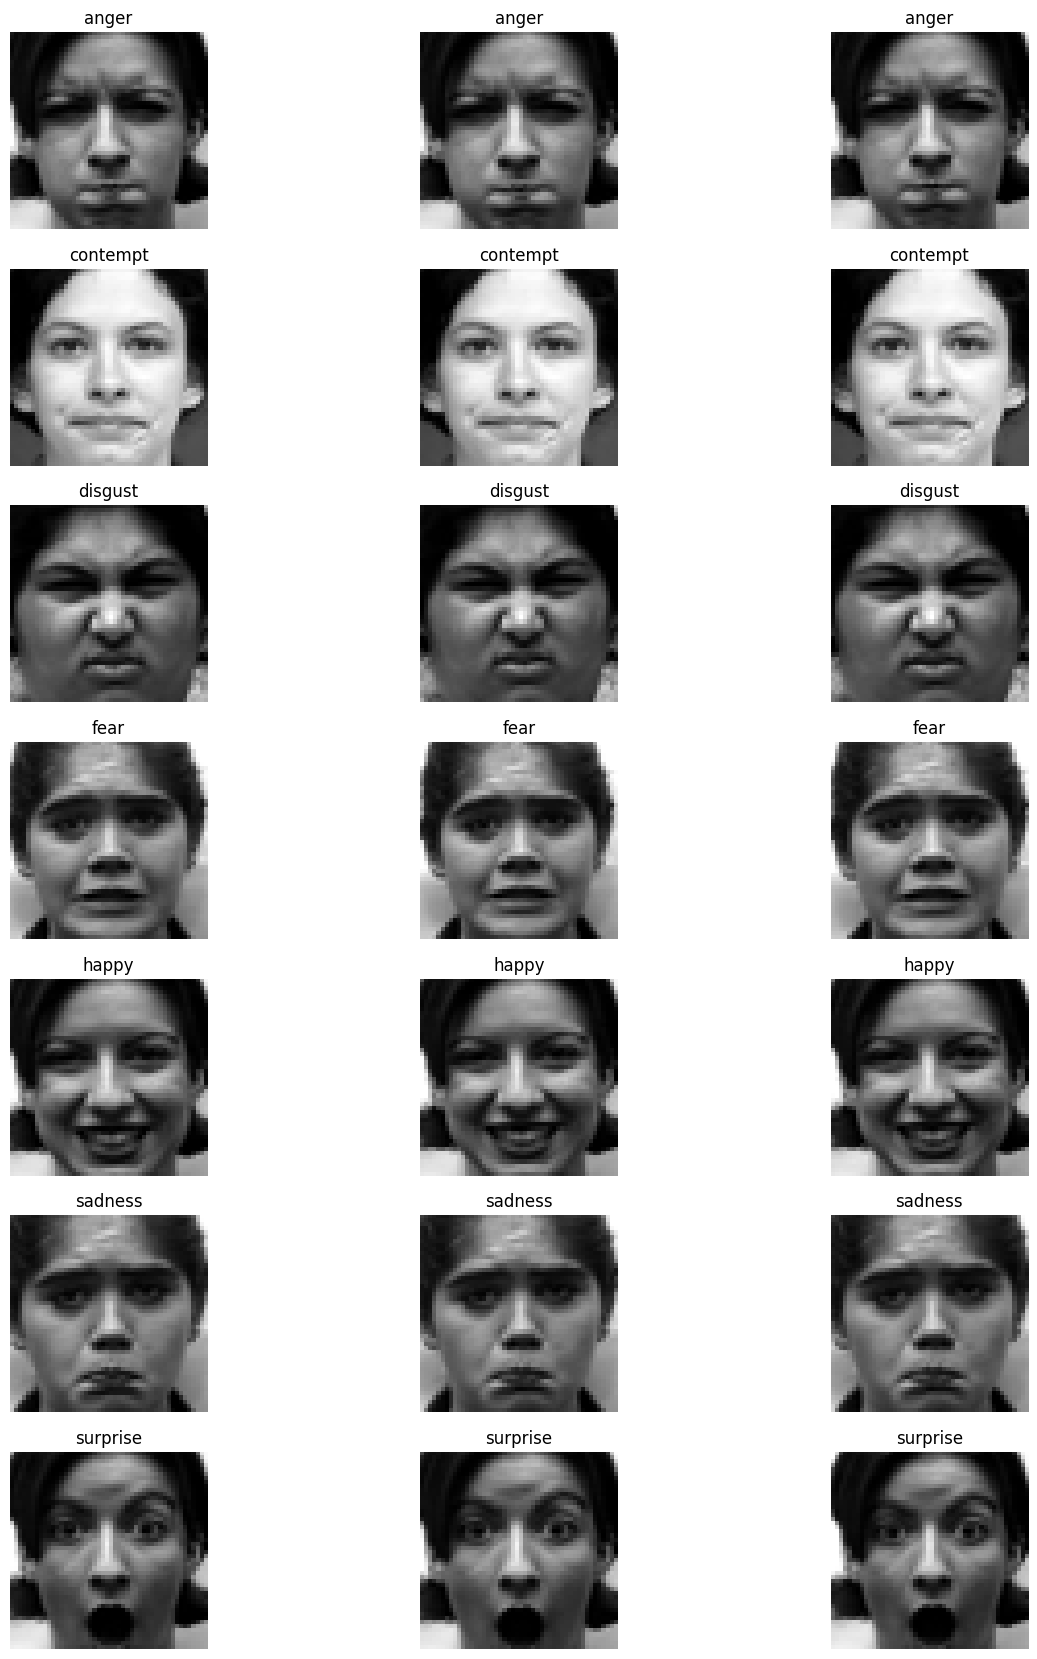

In [2]:
folder_path = "ck_dataset"
emotions = os.listdir(folder_path)

# size of the figure
plt.figure(figsize=(15, 3 * len(emotions)))

for i, emotion in enumerate(emotions):
    # we take 3 images from each subdirectory
    emotion_path = os.path.join(folder_path, emotion)
    images = os.listdir(emotion_path)[:3]  

    for j, img_file in enumerate(images):
        # path to one image
        img_path = os.path.join(emotion_path, img_file)
        # convert("L") converts the image to greyscale
        img = Image.open(img_path).convert("L")

        # plot image in grid
        plt.subplot(len(emotions), 3, i * 3 + j + 1)
        plt.imshow(img, cmap="gray")
        plt.title(emotion) 
        plt.axis('off') 

        # print size of the image
        img_size = os.path.getsize(img_path)
        print(f"{emotion:>17}: {img_file}\t rozmiar w bajtach: {img_size}\t liczba piskeli {img.size[0]}x{img.size[1]}")

In [3]:
for i, emotion in enumerate(emotions):
    emotion_path = os.path.join(folder_path, emotion)
    images = os.listdir(emotion_path)

    print(f"{emotion:>17}:\t Liczba zdjęć: {len(images)}")

            anger:	 Liczba zdjęć: 135
         contempt:	 Liczba zdjęć: 54
          disgust:	 Liczba zdjęć: 177
             fear:	 Liczba zdjęć: 75
            happy:	 Liczba zdjęć: 207
          sadness:	 Liczba zdjęć: 84
         surprise:	 Liczba zdjęć: 249


**Komentarz:**

- Liczba zdjęć nie jest zrównoważona.
- Np. dla klady *surprise* jest aż 249 zdjęć, a dla klasy *contempt* zaledwie 54 zdjęcia
- To jest problem, ponieważ jeśli klasy nie są zrównoważone, to model uczenia maszynowego może mieć skłonność do preferowania klasy o większej liczebności i przez to generalizować w niewłaściwy sposób

**Co można z tym zrobić?**

*Augementacja* - jest to proces generowania nowych danych, poprzez wprowadzanie losowych zmian do oryginalnych danych.

Możemy np. wykonać
- obracanie
- odbicie lustrzane
- zmiana jasności
- przesuwanie

Dzięki temu wygeenrujemy nowe przykłady uczące.

Inne sposoby zrównoważenia klas to np.
- oversampling -> w klasie o małej liczności duplikujemy istniejące próbki (np. technika SMOTE)
- Generowanie syntetycznych modeli (GANs) do generowania nowych danych synetycznych (?? na później)
- Ważone straty -> wprowadzenie wag do funkcji straty, aby zwiększyć wagę błędów klas mniejszościowej (?? na później)

Na początku można również wykonać wizualizację danych aby je lepiej zrozumieć.

- Istnieje technika t-sne do redukcji wymiarowości cech (ogólnie zbioru danych np. zdjęć ale też innych)
- Np. to https://learnopencv.com/t-sne-for-feature-visualization/
- W tym tutorialu jest opisane jak można zwizualizować sobie klastry klas (w naszym przypadku emocji) przy redukcji do przestrzeni 2D. Jest to opisane dla zdjęć zwierząt, ale zastanawiam się czy zadziała też dla naszego zbioru